# Regression and Random Forest Algorithms - Practical Exercise
## Gregorio Mendoza Serrano

In [ ]:
pip install ucimlrepo

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np

## Linear Regression

Consider the following dataframe with the following columns:

In [ ]:
from ucimlrepo import fetch_ucirepo

auto_mpg = fetch_ucirepo(id=9)

X = auto_mpg.data.features
Y = auto_mpg.data.targets

df=pd.concat([X,Y],axis=1)

Consider the following dataframe with the following columns:

**displacement**: Total engine displacement volume.

**cylinders**: Number of cylinders in the car's engine.

**horsepower**: Horsepower of the car's engine.

**weight**: Weight of the car.

**acceleration**: Acceleration time from 0 km/h to 100 km/h in seconds.

**model_year**: Manufacturing year of the car.

**origin**: Origin of the car, represented by a numeric code indicating the country of origin.

**mpg**: Miles per gallon (MPG) the car can travel.

Before developing the exercise, we use `.head()` and `.describe()` to check the overall appearance of the dataset:

In [ ]:
df.head()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
0,307.0,8,130.0,3504,12.0,70,1,18.0
1,350.0,8,165.0,3693,11.5,70,1,15.0
2,318.0,8,150.0,3436,11.0,70,1,18.0
3,304.0,8,150.0,3433,12.0,70,1,16.0
4,302.0,8,140.0,3449,10.5,70,1,17.0


In [ ]:
df.describe()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
count,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,193.425879,5.454774,104.469388,2970.424623,15.568090,76.010050,1.572864,23.514573
std,104.269838,1.701004,38.491160,846.841774,2.757689,3.697627,0.802055,7.815984
min,68.000000,3.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,9.000000
25%,104.250000,4.000000,75.000000,2223.750000,13.825000,73.000000,1.000000,17.500000
50%,148.500000,4.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,23.000000
75%,262.000000,8.000000,126.000000,3608.000000,17.175000,79.000000,2.000000,29.000000
max,455.000000,8.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,46.600000


**1.- Variable Identification:**

  **a)** Identify the categorical variables and the continuous variables.

  **b)** Calculate the number of records and columns in the dataframe.

  **c)** Calculate the number of missing values in the dataframe.

  **d)** Using only the information calculated up to this point: Which variables would it make sense to calculate a linear regression on?
We carry out the required operations in the statement in the code block:

Note: The answer to part a) is detailed at the beginning of the code block below.

In [ ]:
# a) Identify the categorical and continuous variables:

# Continuous variables:
numeric_var = ['displacement', 'horsepower', 'weight', 'acceleration', 'mpg']

# Categorical variables:
categorical_var = ['cylinders', 'model_year', 'origin']

# b) Calculate the number of records and columns
num_registros, num_columnas = df.shape
print("\nNumber of Records:", num_registros)
print("Number of Columns:", num_columnas)

# c) Calculate the number of missing values
missing_values_null = df.isnull().sum().sum()
missing_values_nan = df.isna().sum().sum()
print("\nNumber of Null Values in the DataFrame:", missing_values_null)
print("Number of NaN Values in the DataFrame:", missing_values_nan)

# Get the number of missing values by column:
missing_values_null_por_columna = df.isnull().sum()
missing_values_nan_por_columna = df.isna().sum()
print("\nNumber of Null Values by Column:\n", missing_values_null_por_columna)
print("\nNumber of NaN Values by Column:\n", missing_values_nan_por_columna)


Número de Registros: 392
Número de Columnas: 8

Número de Valores Null en el DataFrame: 0
Número de Valores NaN en el DataFrame: 0

Número de Valores Null por Columna:
 displacement    0
cylinders       0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
mpg             0
dtype: int64

Número de Valores NaN por Columna:
 displacement    0
cylinders       0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
mpg             0
dtype: int64


**2.- Data Visualization**

Using the matplotlib library:

  **a)** Create a histogram of the weight of the vehicles. What can you deduce from this histogram?

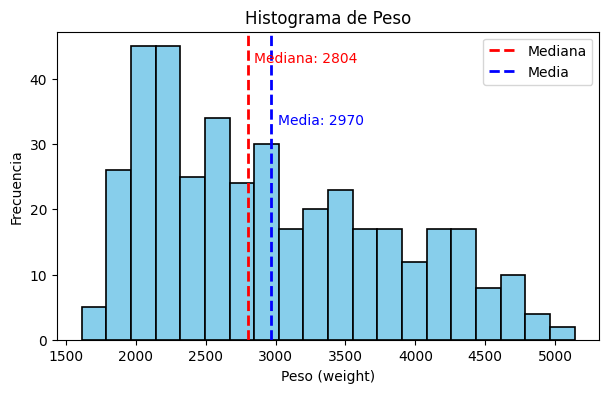

In [ ]:
# Create the histogram with a continuous line and a vertical line for the median
plt.figure(figsize=(7, 4))
plt.hist(df['weight'], bins=20, color='skyblue', edgecolor='black', linewidth=1.2)
plt.axvline(df['weight'].median(), color='red', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(df['weight'].mean(), color='blue', linestyle='dashed', linewidth=2, label='Mean')
plt.legend()

# Add text label for the median
plt.text(df['weight'].median() + 45, plt.ylim()[1]*.9, f'Median: {round(df["weight"].median(),0).astype(int)}', color='red')

# Add text label for the mean
plt.text(df['weight'].mean() + 45, plt.ylim()[1]*.7, f'Mean: {round(df["weight"].mean(),0).astype(int)}', color='blue')

# Configure labels and title
plt.xlabel('Weight (weight)')
plt.ylabel('Frequency')
plt.title('Weight Histogram')

# Show the histogram
plt.show()

In the drawn histogram, we observe the following:
- The histogram is left-skewed. The most common cars in the dataset are those with a weight between approximately 2000 and 2250 kilograms (the mode would be in this range of values), standing out in terms of frequency over the rest. As the weight increases, the frequency in the dataset decreases almost linearly.
- In the range of maximum frequency of values (2000-2250 kg), it is likely that we will find the most commercially successful models, and therefore many repeated or very similar values (the same car model may have slightly different weights depending on small interior modifications by the user or sub-variants of the model).

**b)** Create a scatter plot between the weight and horsepower variables. What do you deduce about the relationship between these two variables?

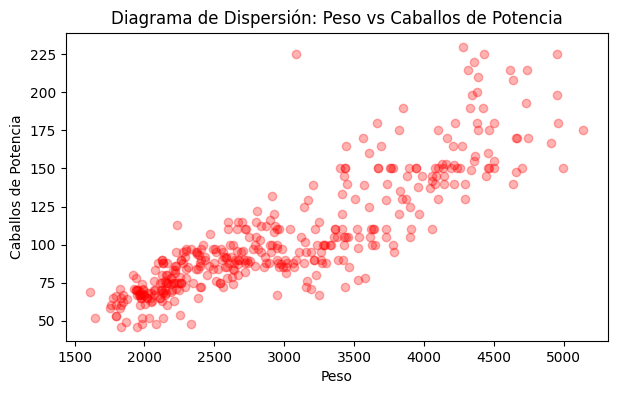

In [ ]:
# b) Scatter plot between weight and horsepower
plt.figure(figsize=(7, 4))
plt.scatter(df['weight'], df['horsepower'], color='red', alpha=0.3)
plt.title('Scatter Plot: Weight vs Horsepower')
plt.xlabel('Weight')
plt.ylabel('Horsepower')
plt.show()


From the scatter plot, we deduce the following:
- Visually, a linear increasing trend can be observed in the scatter plot, with greater weight usually implying greater horsepower.
- Consistent with the histogram from the previous section, we observe a large number of points clustered around the interval 2000-2250 kg, which could correspond to certain small/medium-sized car models of utilitarian use and great commercial success: this is confirmed by observing that their horsepower values are almost the same.
- Once we go above approximately 3000 kg, the weight/horsepower data points are much more dispersed. This makes sense if we consider that these values could correspond to both high-end cars and special-use vehicles (work, SUVs, etc.), both types of which have greater differences in equipment and extras required by each individual.
- Some outliers with a much higher horsepower/weight ratio than the rest are observed. These points could correspond to high-performance sports cars.
- The previously described points would be captured much better by observing the remaining independent variables of the dataset (year of manufacture, consumption/mpg, etc.).

**c)** Update the dataframe using the statement “df = df.dropna()”, removing the missing values. What is the resulting size of the dataframe?

In the block below, the NaN values are removed and the resulting size of the dataset is shown:

In [ ]:
df = df.dropna()  # Remove rows with NaN values
# Recalculate the number of records and columns:
num_registros, num_columnas = df.shape
print("\nNumber of Records:", num_registros)
print("Number of Columns:", num_columnas)


Número de Registros: 392
Número de Columnas: 8


**3.- Linear Regression**

Using the sklearn library:

  **a)** Take the horsepower variable as the target for linear regression. Split the dataframe into training and test sets.

  **b)** Perform a simple linear regression model using the weight of the vehicle as the predictor variable. Calculate the predictions of your test set and, through them, the R² of the model.

  **c)** Perform a multiple linear regression model using the weight of the vehicle and adding 'model_year', 'displacement', 'cylinders', 'acceleration' as the predictor variables. Calculate the predictions of your test set and, through them, the R² of the model.
  
In the code block below, the three subsections of this exercise are developed:

In [ ]:
# First, for convenience, we will organize the dataframe by increasing weight:
df = df.sort_values(by='weight')

# a) Split the DataFrame into training and test sets
X = df[['weight', 'model_year', 'displacement', 'cylinders', 'acceleration']]
y = df['horsepower']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# b) Simple linear regression model using the weight of the vehicle as the predictor variable:
model_simple = LinearRegression()
model_simple.fit(X_train[['weight']], y_train)

# Predictions on the test set:
y_pred_simple = model_simple.predict(X_test[['weight']])

# R² of the simple model:
r2_simple = r2_score(y_test, y_pred_simple)
print("R² of the simple linear regression model:", r2_simple)

# c) Multiple linear regression model:
model_multiple = LinearRegression()
model_multiple.fit(X_train, y_train)

# Predictions on the test set
y_pred_multiple = model_multiple.predict(X_test)

# R² of the multiple model:
r2_multiple = r2_score(y_test, y_pred_multiple)
print("R² of the multiple linear regression model:", r2_multiple)

R² del modelo de regresión lineal simple: 0.7383267976854746
R² del modelo de regresión lineal múltiple: 0.8709237733808519


In view of the result, we obtain a coefficient of determination (R²) of 73.4% for the multiple linear regression, which indicates that the variability of the horsepower values is moderately well explained by the variability of the weight, although there is room for improvement.

In comparison with the simple linear regression model, the R² we obtain with the multiple linear regression model (87.2%) suggests that the inclusion of additional variables has greatly improved the model's ability to explain the variability in the horsepower values, resulting in a fairly good linear model.

This coincides with the argumentation from previous sections where the dispersion of horsepower values increased with weight: for example, the year of manufacture influences the horsepower/weight relationship, as well as acceleration capacity and the number of cylinders, among others - and these differences become more apparent in heavier vehicles.

## Logistic Regression

**Statement:**

You work at a real estate agency and are asked to create a model for potential homes to buy based on certain characteristics of a given dataframe.

Using the scikit-learn library, and separating your dataframe into training and test sets, calculate a logistic regression model where, given a home with its longitude, latitude, median age of the area, total number of rooms, total number of bedrooms, population of the area, total number of households in the area, and median household income in the area, you can calculate whether it is feasible or not to buy it for the real estate agency.

Feasibility is determined by the appraised price of the home: it must be less than 180,000 euros. For future records, this appraisal will not be available, and feasibility must be calculated based on all other characteristics.

Calculate the Gini coefficient and plot the ROC curve for your model.

Consider the following dataframe (named `df_RL` to avoid conflict in execution with the `df` dataframe from the previous section):

In [ ]:
df_RL = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")

valor_casa = df_RL.median_house_value
valor      = 180000

df_RL['affordability']=np.where(valor_casa>valor,0,1)
df_RL = df_RL.drop('median_house_value',axis=1)

With the following variables:

**longitude**: The geographical longitude of the home's location.

**latitude**: The geographical latitude of the home's location.

**housing_median_age**: The median age of the homes in the area. It may represent how long the homes in that area have been standing.

**total_rooms**: The total number of rooms in the homes in that area.

**total_bedrooms**: The total number of bedrooms in the homes in that area.

**population**: The total population in that area.

**households**: The total number of households in that area.

**median_income**: The median annual household income in that area.

**affordability**: The ability to afford the purchase of the house based on its value.

Let's develop the required model as stated:

First, we define the training and test sets:

In [ ]:
# Create X and y sets to later split them into test and train subsets:
X = df_RL[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]
y = df_RL['affordability']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

Let's standardize the training and test sets to improve accuracy:

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Let's now define the model and train it:

In [ ]:
# Model initialization and training.
# We specify max_iter = 1000 to ensure convergence.
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

We make the test prediction and calculate the confusion matrix and metrics from the *Classification Report* to evaluate our model:

In [ ]:
# Predictions on the test set
y_pred = model.predict(X_test_scaled)

# Confusion matrix and metrics
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[1422  280]
 [ 259 1439]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1702
           1       0.84      0.85      0.84      1698

    accuracy                           0.84      3400
   macro avg       0.84      0.84      0.84      3400
weighted avg       0.84      0.84      0.84      3400



From the confusion matrix, we draw the following conclusions:

-- Our Accuracy value is 85%, which is good but can be improved. To improve it slightly, it is recommended to use Support Vector Machine or kNN after binarizing the dependent variable 'affordability' with the price threshold we decide. The logic behind this suggestion is greater flexibility in dealing with non-linear decision boundaries. Intuitively, the case of kNN is curiously a good candidate because it focuses on the nearest houses in longitude and latitude (it would be advisable to reduce the dimensions of the dataset in that case).

-- The Recall and Precision values for the positive case (1) are very similar. It is desirable for Recall to be a bit higher to avoid as many false negatives as possible, as they would cause us economic loss (or time loss in bidding for their purchase only to discover that it is out of our reach).

Gini Score: 0.84




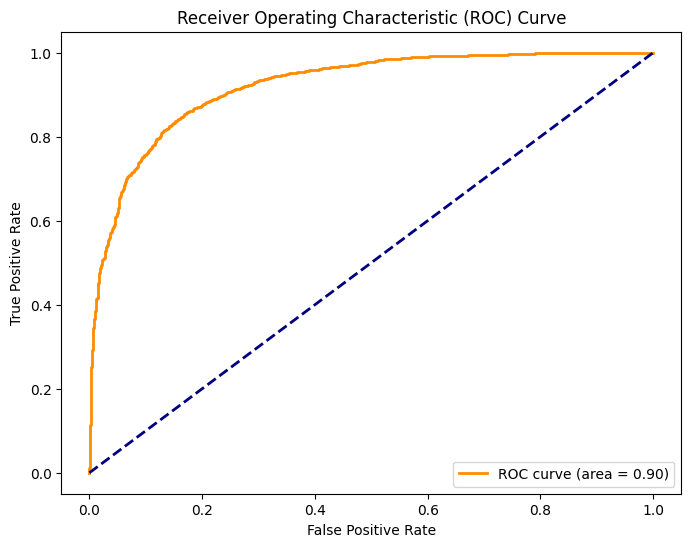

In [ ]:
# Positive class probabilities
y_probs = model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve and area under the curve (AUC)
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Calculate Gini
gini = 2 * roc_auc - 1
print("Gini Score:", gini.round(2))
print("\n")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc.round(1)))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

- The AUC obtained (90%) indicates that the performance is very good and the model tends to discriminate well between the two classes to be predicted.
- The ROC curve, in addition to being above the reference line (drawn as a *dashed blue line* representing random performance), does not stray too far from the optimal point (upper left corner), giving an idea of the solid performance of the model and that there is still some room for improvement.
- The Gini score obtained of 0.84 suggests a relatively high level of impurity in the data, considering that the classes to be classified are unevenly distributed.

## Decision Trees and Random Forest

The dataset is already loaded in the notebook. You will need to create a decision tree regressor (`sklearn.tree.DecisionTreeRegressor`) and predict the result with input values of 180, 200, 250, and 290. Repeat this exercise with the tree parameter `max_depth` set to 1, 3, and 5. Explain the reason for the difference in the prediction.

In [ ]:
from ucimlrepo import fetch_ucirepo
import graphviz
import pydotplus
from IPython.display import Image
from sklearn import tree

data = fetch_ucirepo(id=45)
X = data.data.features[['chol']]
Y = data.data.targets
df_AD = pd.concat([X,Y],axis=1)

Predict the result of the values of the variable `chol` with values of 180, 200, 250, and 290 with different `max_depth` values and explain the differences in the prediction.

In [ ]:
# Values to predict
valores_a_predecir = [180, 200, 250, 290]

# Iterate over different values of max_depth
for depth in [1, 3, 5]:

    # Initialize the decision tree regressor with the max_depth parameter
    model = DecisionTreeRegressor(max_depth=depth)

    # Train the model
    model.fit(X, Y)

    # Make predictions
    predicciones = model.predict(pd.DataFrame(valores_a_predecir, columns=['chol']))

    # Print the results
    print(f"Predictions with max_depth={depth}: {predicciones}")


Predicciones con max_depth=1: [0.83189655 0.83189655 0.83189655 1.28169014]
Predicciones con max_depth=3: [0.5        0.81967213 0.81967213 3.        ]
Predicciones con max_depth=5: [0.28571429 3.         0.82122905 2.        ]


The difference lies in the varying degree of fit provided by the three depths (`max_depth`) that we use when solving the exercise. This parameter gives us the maximum distance between the root and the farthest leaf(s) in the model.

When we use `max_depth=1`, our regression tree will be composed solely of the root and two leaves, corresponding to the two unique regions that our model is capable of differentiating. This causes the predictions with `max_depth=1` to give us only two distinct values, as can be seen above. The model is too simplistic and will produce underfitting to the sample.

When we use `max_depth=3`, our regression tree can have a maximum distance of three levels between the root and the farthest leaves, allowing for two intermediate levels of internal nodes, which could produce a maximum of eight distinct regions. It is observed that now we have three distinct values in the result. The model captures the relationships in the data better but is still limited.

The same logic applies to `max_depth=5`, in which we could obtain a maximum of 32 distinct regions. It is noticeable that we obtain a distinct value for each input value to predict, as the model can now capture more complex patterns in the data. We must be careful when increasing the depth of our decision tree, as we run the risk of our model overfitting to the training set and consequently performing poorly on unseen data.